pandas: A data manipulation library that provides data structures for
efficiently storing large datasets and tools for working with them.

matplotlib.pyplot: A plotting library for creating static, animated, and interactive visualizations in Python.

numpy: A library for numerical operations in Python, providing support for large, multi-dimensional arrays and matrices.

seaborn: A statistical data visualization library based on matplotlib. It provides an interface for drawing attractive and informative statistical graphics.

MultiOutputRegressor: A wrapper for multi-output regression estimators. It fits one regressor per target and can handle multiple target variables.

Pipeline: A class for creating a linear sequence of data transformation and model fitting steps.

StandardScaler: A preprocessing step that standardizes features by removing the mean and scaling to unit variance.

MLPRegressor: Multi-layer Perceptron regressor, an implementation of a neural network-based regressor.

IsolationForest: An anomaly detection algorithm based on isolating instances in a data set.

RandomForestRegressor: A regression algorithm based on ensemble learning using decision trees.

KNeighborsRegressor: A regression algorithm based on k-nearest neighbors

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

Importing the drive module from google.colab:

The google.colab library in Colab provides various utilities for working with Google Colab features, and the drive module specifically deals with Google Drive-related functionality.
Mounting Google Drive:

The drive.mount('/content/drive') function call is used to mount Google Drive into the Colab environment.
The argument '/content/drive' specifies the directory in the Colab environment where Google Drive will be mounted. This path is a common convention in Colab.

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/drive/MyDrive/DSL_Winter_Project_2024.zip ./

# !gdown https://drive.google.com/uc?id=1RqoGwJ7lkcXc7INE9hINUQZW2O8ltBcB

!unzip -q ./DSL_Winter_Project_2024.zip
!mv ./DSL_Winter_Project_2024/development.csv .
!mv ./DSL_Winter_Project_2024/evaluation.csv .
!mv ./DSL_Winter_Project_2024/sample_submission.csv .
!rm -rf /content/__MACOSX ./DSL_Winter_Project_2024 ./DSL_Winter_Project_2024.zip

In [46]:
#read development.csv (Which is the training data)
df = pd.read_csv('/content/drive/MyDrive/development.csv')

In [14]:
#read evaluation.csv (Which is the testing data)
eval = pd.read_csv('/content/drive/MyDrive/evaluation.csv')

In [15]:
#store 'Id' column from evaluation data and remove it frame deataframe for handling feature selection, model testing ,etc.
ids = eval['Id']
eval.drop('Id',axis=1,inplace=True)

In [16]:
#Split data into x and y which are features and targets respectively from development data
X = df.drop(['x','y'],axis=1)
y = df[['x','y']]

In [47]:
#creating new data frame for storing the median of each record for each pad
df_reshaped = pd.DataFrame()
for i in range(18):
    event_columns = [f'pmax[{i}]', f'negpmax[{i}]' , f'area[{i}]', f'tmax[{i}]', f'rms[{i}]']
    df_reshaped[f'Pad[{i}]'] = df[event_columns].values.tolist()
df_reshaped = df_reshaped.applymap(lambda x: np.median(x))

<ipython-input-49-f3a3eeecaaad>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-49-f3a3eeecaaad>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-49-f3a3eeecaaad>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in s

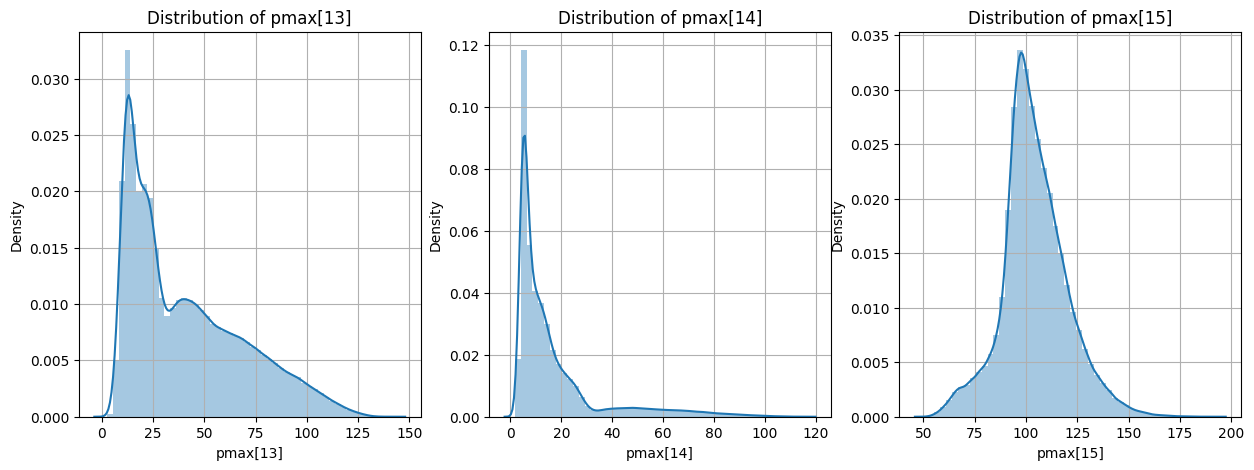

In [49]:
#plot distribution of pmax column for pad 13,14,15 of main dataframe
plt.figure(figsize=(15,5))
for i, column in enumerate(['pmax[13]', 'pmax[14]', 'pmax[15]'], 1):
    plt.subplot(1, 3, i)
    sns.distplot(df[column])
    plt.grid(True)
    plt.title(f'Distribution of {column}')

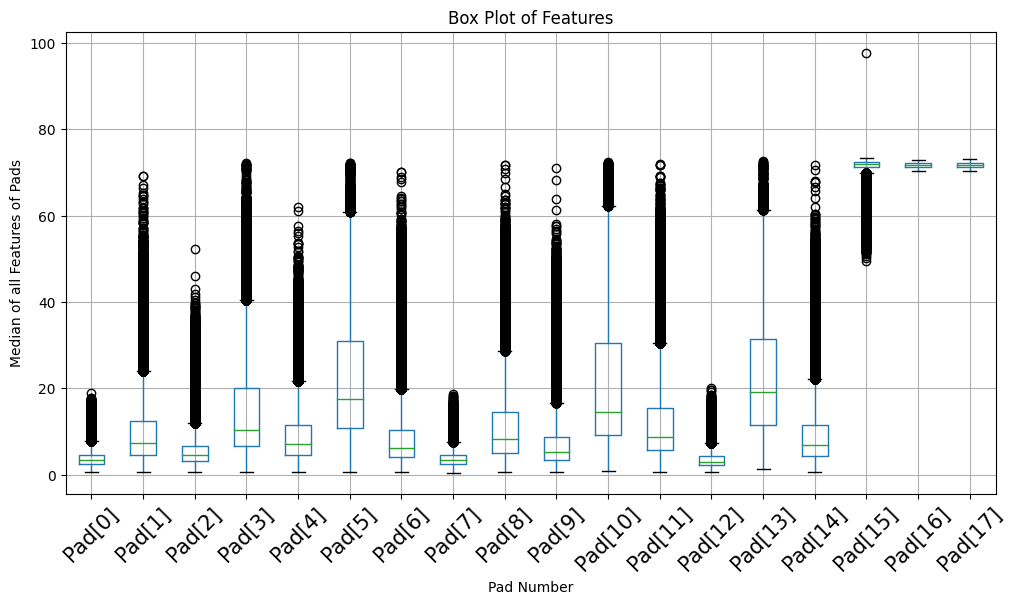

In [50]:
#plot a boxplot of each pad for detecting noise pads
plt.figure(figsize=(12, 6))
df_reshaped.boxplot(rot=45, fontsize=10,grid=True)
plt.title('Box Plot of Features')
plt.ylabel('Median of all Features of Pads')
plt.xlabel('Pad Number')
plt.xticks(fontsize=15)
plt.grid(True)
plt.show()

<ipython-input-9-bdecf5134f61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reshaped[f'Pad[{i}]'])


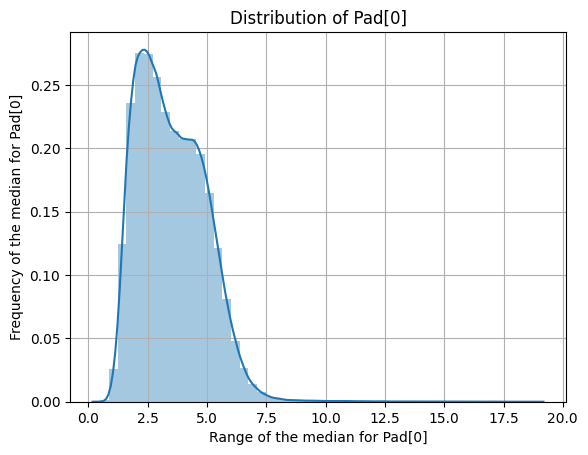

<ipython-input-9-bdecf5134f61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reshaped[f'Pad[{i}]'])


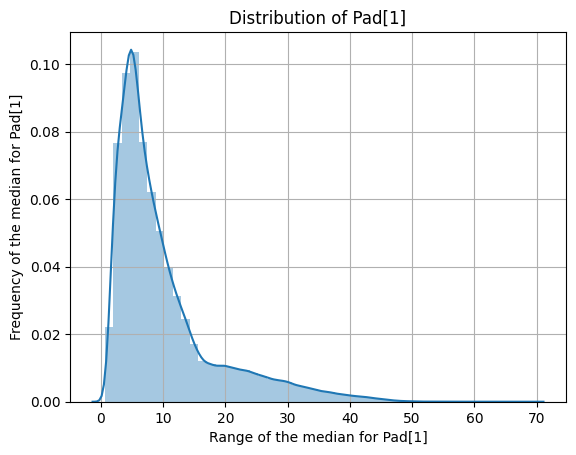

<ipython-input-9-bdecf5134f61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reshaped[f'Pad[{i}]'])


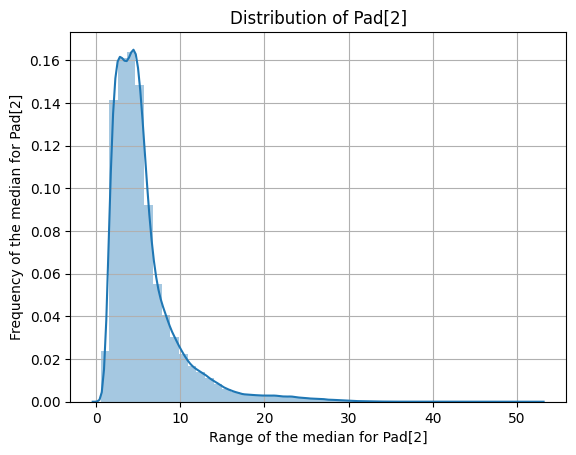

<ipython-input-9-bdecf5134f61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reshaped[f'Pad[{i}]'])


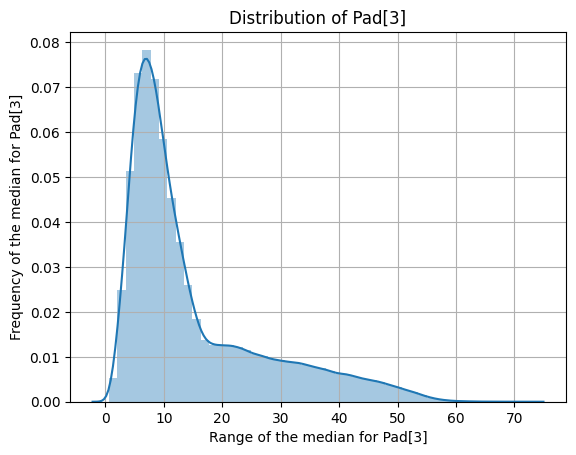

<ipython-input-9-bdecf5134f61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reshaped[f'Pad[{i}]'])


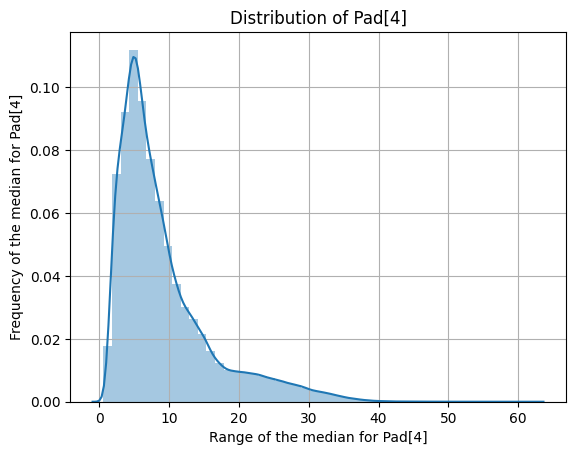

<ipython-input-9-bdecf5134f61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reshaped[f'Pad[{i}]'])


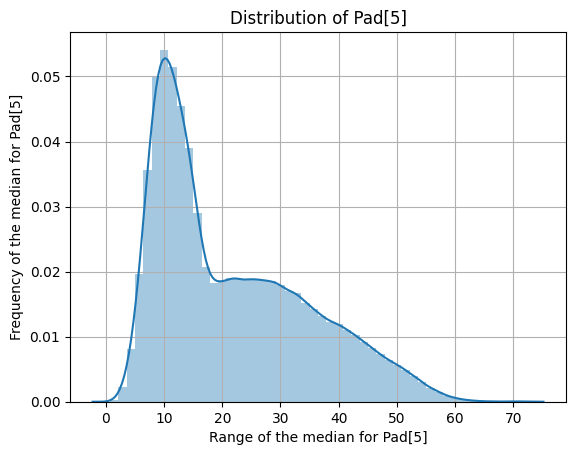

<ipython-input-9-bdecf5134f61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reshaped[f'Pad[{i}]'])


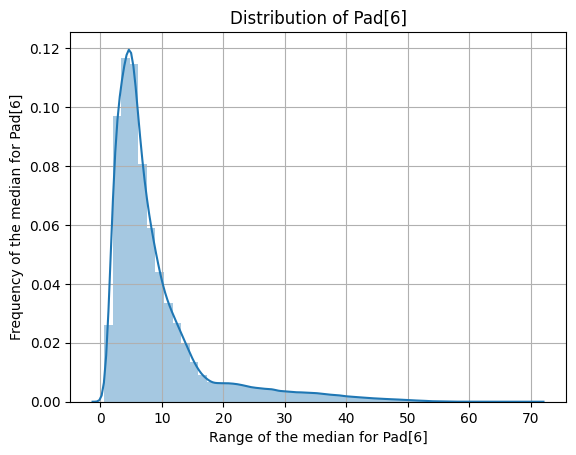

<ipython-input-9-bdecf5134f61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reshaped[f'Pad[{i}]'])


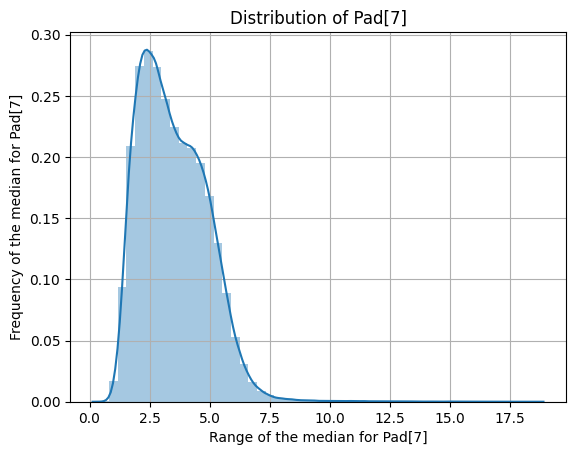

<ipython-input-9-bdecf5134f61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reshaped[f'Pad[{i}]'])


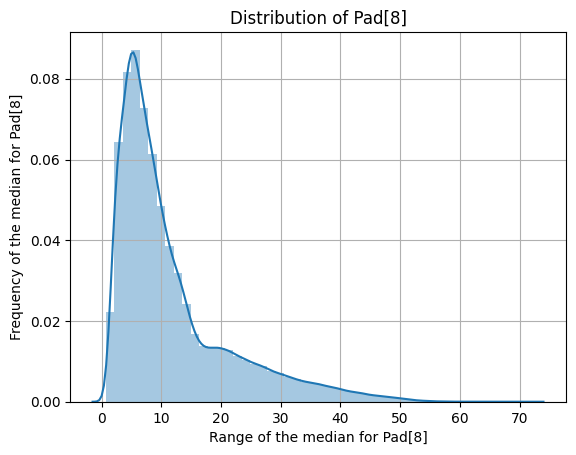

<ipython-input-9-bdecf5134f61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reshaped[f'Pad[{i}]'])


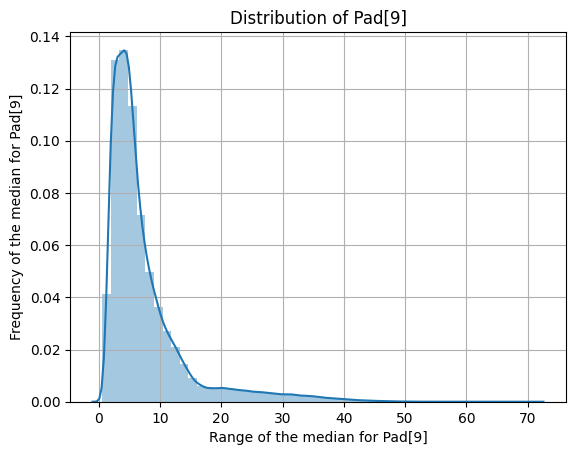

<ipython-input-9-bdecf5134f61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reshaped[f'Pad[{i}]'])


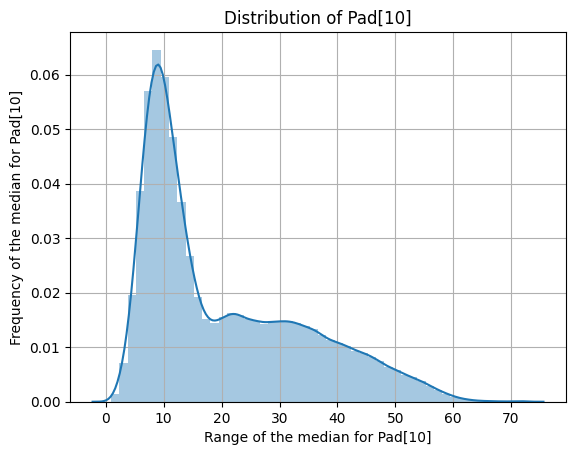

<ipython-input-9-bdecf5134f61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reshaped[f'Pad[{i}]'])


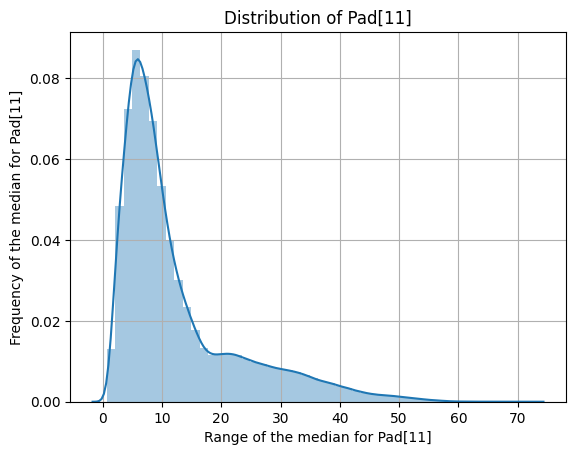

<ipython-input-9-bdecf5134f61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reshaped[f'Pad[{i}]'])


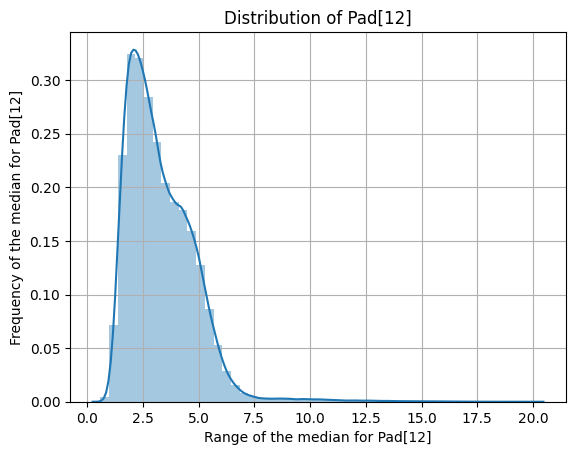

<ipython-input-9-bdecf5134f61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reshaped[f'Pad[{i}]'])


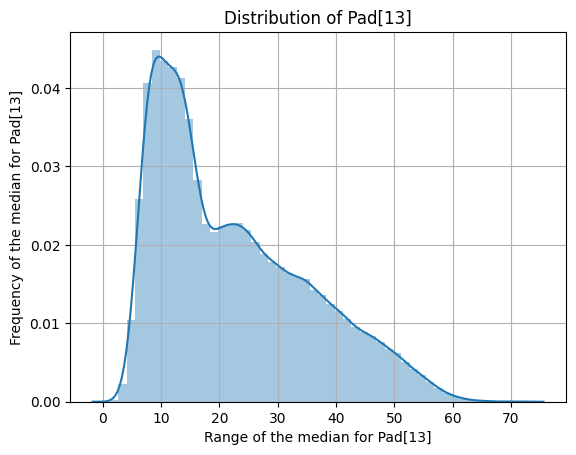

<ipython-input-9-bdecf5134f61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reshaped[f'Pad[{i}]'])


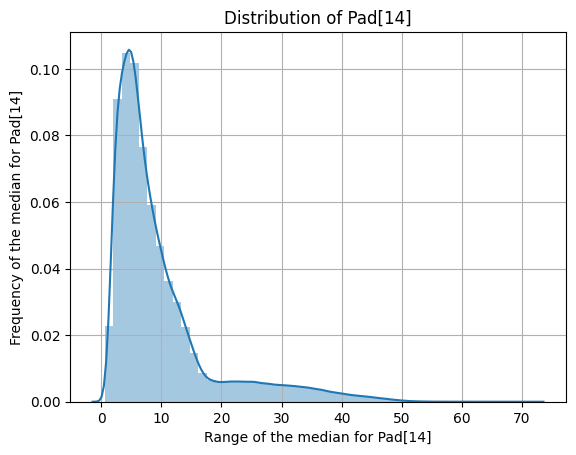

<ipython-input-9-bdecf5134f61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reshaped[f'Pad[{i}]'])


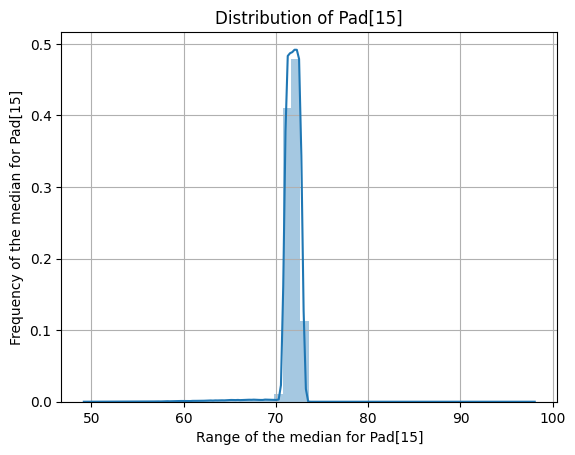

<ipython-input-9-bdecf5134f61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reshaped[f'Pad[{i}]'])


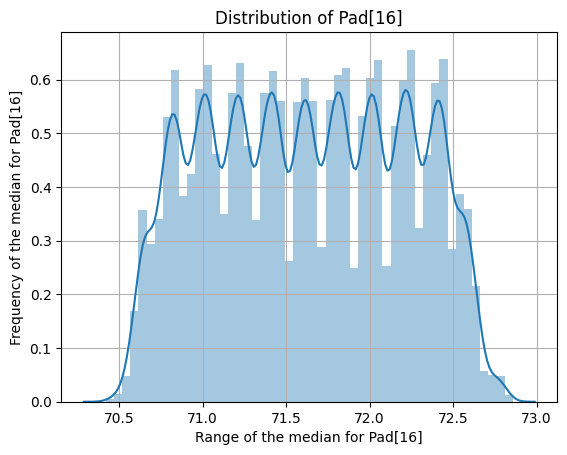

<ipython-input-9-bdecf5134f61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reshaped[f'Pad[{i}]'])


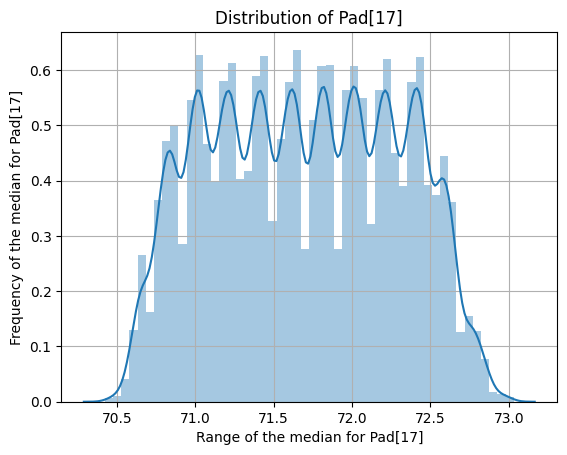

In [ ]:
#plot distribution of median values for each pad
for i in range(18):
  sns.distplot(df_reshaped[f'Pad[{i}]'])
  plt.grid(True)
  plt.title(f"Distribution of Pad[{i}]")
  plt.xlabel(f"Range of the median for Pad[{i}]")
  plt.ylabel(f"Frequency of the median for Pad[{i}]")
  plt.show()

<ipython-input-51-6e257236924c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reshaped[column])
<ipython-input-51-6e257236924c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reshaped[column])
<ipython-input-51-6e257236924c>:5: UserWarning: 

`distplot` is a deprecated function and wi

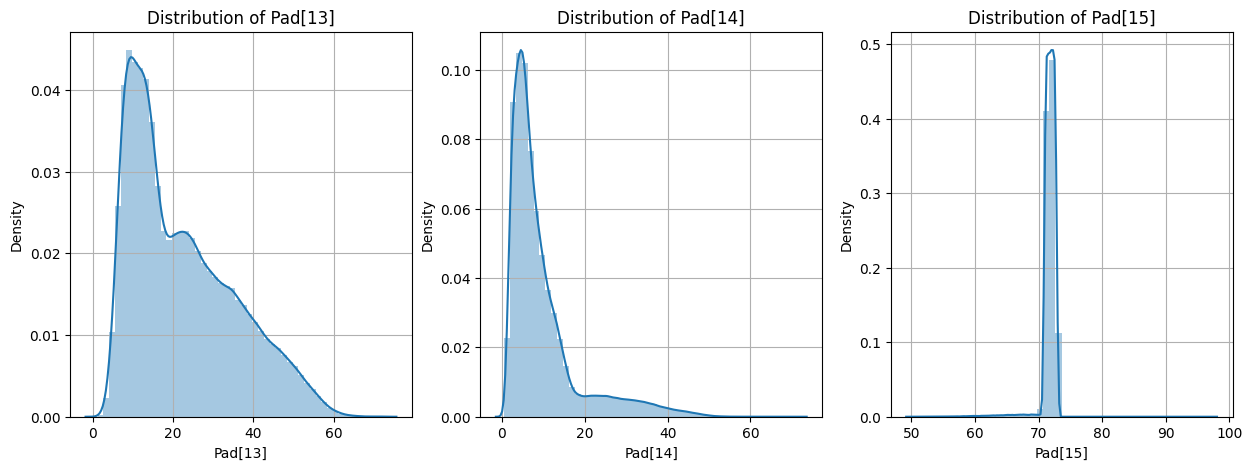

In [51]:
#plot the distribution of Pads 13,14,15 for plotting
plt.figure(figsize=(15,5))
for i, column in enumerate(['Pad[13]', 'Pad[14]', 'Pad[15]'], 1):
    plt.subplot(1, 3, i)
    sns.distplot(df_reshaped[column])
    plt.grid(True)
    plt.title(f'Distribution of {column}')

Delete Noise Pads

In [20]:
#delete noisy pads from development data
cols_drop = [0,7,12,15,16,17]
for col in cols_drop:
    df.drop([f'pmax[{col}]',f'area[{col}]',f'tmax[{col}]',f'negpmax[{col}]',f'rms[{col}]'],axis=1,inplace=True)

In [21]:
#delete noisy pads from evaluation data
cols_drop = [0,7,12,15,16,17]
for col in cols_drop:
    eval.drop([f'pmax[{col}]',f'area[{col}]',f'tmax[{col}]',f'negpmax[{col}]',f'rms[{col}]'],axis=1,inplace=True)

Outlier Deletion

In [52]:
#create IsolationForest instance and detect outlier and delete them from developement dataframe
clf = IsolationForest(contamination='auto')
outliers = clf.fit_predict(df)
df = df[outliers == 1]

In [22]:
#definig feature set for training
X = df.drop(['x','y'],axis=1)

In [23]:
#defining target set for training
y = df[['x','y']]

In [ ]:
#define RandomForestRegressor instance for training model with 60 feature column aim to detect importance of each feature for predicting both X,Y
rf_model = RandomForestRegressor(n_estimators=100,max_features='sqrt',max_depth=40,min_samples_split=10,min_samples_leaf=5)

In [ ]:
#define a pipeline that contains StandardScaler for standardize data and MutlioutputRegreesor for handeling model through predicting both features
pipeline_rf = Pipeline([
    ('scaler',StandardScaler()),
    ('rfr',MultiOutputRegressor(rf_model))
])

In [ ]:
#fitting data into training set
pipeline_rf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfr',
                 MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=40,
                                                                      max_features='sqrt',
                                                                      min_samples_leaf=5,
                                                                      min_samples_split=10)))])

In [ ]:
#store the importance of features for predicting x and also for y, in an array, which contains two array, first array stored feature importance for predicting x and second one for predicting y
feature_importances = [estimator.feature_importances_ for estimator in pipeline_rf.named_steps['rfr'].estimators_]

In [ ]:
feature_importances

[array([8.71219091e-02, 5.22886760e-02, 2.32430146e-02, 2.10525484e-03,
        2.24561330e-05, 9.21567101e-03, 1.44522562e-03, 1.08372143e-03,
        5.62184233e-05, 2.33221034e-05, 1.21811568e-02, 6.15761401e-03,
        4.22702007e-03, 1.99944494e-05, 2.24278722e-05, 6.79578204e-03,
        4.40549255e-03, 2.28120755e-03, 6.49953100e-05, 2.27100394e-05,
        2.38596446e-02, 2.95089021e-02, 1.52119083e-02, 1.63848372e-05,
        2.26810555e-05, 3.84379460e-02, 4.66771595e-03, 4.43158088e-03,
        1.38531191e-04, 2.26647707e-05, 1.58514125e-01, 7.15434845e-02,
        7.08133862e-02, 7.86653169e-04, 2.31411009e-05, 1.65146143e-02,
        3.40780281e-03, 4.73294693e-03, 1.08313555e-03, 2.26262066e-05,
        2.37996618e-02, 2.22215524e-02, 1.69758503e-02, 1.91402511e-05,
        2.28903693e-05, 9.79744595e-03, 4.67958494e-03, 4.70846848e-03,
        3.85548499e-05, 2.30671619e-05, 9.94264010e-02, 3.13056478e-02,
        2.77863457e-02, 1.48631095e-05, 2.27161757e-05, 5.640119

In [53]:
feature_importance_x = [8.71219091e-02, 5.22886760e-02, 2.32430146e-02, 2.10525484e-03,
        2.24561330e-05, 9.21567101e-03, 1.44522562e-03, 1.08372143e-03,
        5.62184233e-05, 2.33221034e-05, 1.21811568e-02, 6.15761401e-03,
        4.22702007e-03, 1.99944494e-05, 2.24278722e-05, 6.79578204e-03,
        4.40549255e-03, 2.28120755e-03, 6.49953100e-05, 2.27100394e-05,
        2.38596446e-02, 2.95089021e-02, 1.52119083e-02, 1.63848372e-05,
        2.26810555e-05, 3.84379460e-02, 4.66771595e-03, 4.43158088e-03,
        1.38531191e-04, 2.26647707e-05, 1.58514125e-01, 7.15434845e-02,
        7.08133862e-02, 7.86653169e-04, 2.31411009e-05, 1.65146143e-02,
        3.40780281e-03, 4.73294693e-03, 1.08313555e-03, 2.26262066e-05,
        2.37996618e-02, 2.22215524e-02, 1.69758503e-02, 1.91402511e-05,
        2.28903693e-05, 9.79744595e-03, 4.67958494e-03, 4.70846848e-03,
        3.85548499e-05, 2.30671619e-05, 9.94264010e-02, 3.13056478e-02,
        2.77863457e-02, 1.48631095e-05, 2.27161757e-05, 5.64011975e-02,
        1.68969729e-02, 2.71587566e-02, 2.13486930e-03, 2.22683725e-05]
feature_importance_y = [8.01365527e-03, 1.60094253e-02, 4.70751417e-03, 3.22674959e-04,
        3.15006710e-05, 1.78600527e-02, 3.58363543e-03, 1.19064010e-03,
        1.74893274e-03, 3.15075319e-05, 1.22405176e-01, 8.13690844e-02,
        2.41957240e-02, 2.10876441e-04, 3.26142082e-05, 9.14689360e-02,
        2.69224874e-02, 3.80338339e-02, 3.23312963e-03, 3.12241932e-05,
        3.80110791e-02, 2.97230157e-02, 2.24462595e-02, 2.53773638e-05,
        3.24651404e-05, 2.60213787e-02, 7.74364782e-03, 1.06601347e-02,
        2.95321113e-04, 3.09044617e-05, 7.14443797e-03, 3.68310684e-03,
        2.49530817e-03, 3.11639462e-05, 3.22853629e-05, 1.99634907e-02,
        7.74863326e-03, 9.87936319e-03, 1.05512095e-03, 3.18094901e-05,
        5.72501499e-02, 2.56101712e-02, 3.80271240e-02, 3.13475539e-05,
        3.17856307e-05, 8.56621785e-02, 3.45298493e-02, 6.35932908e-02,
        2.59729551e-04, 3.13048080e-05, 1.59549404e-02, 1.44766041e-02,
        1.17261448e-02, 1.97707082e-05, 3.22371670e-05, 9.64732490e-03,
        5.15239298e-03, 9.41217627e-03, 6.28198518e-05, 3.17292055e-05]

In [25]:
#create a dataframe for showing the importance for predicting x and y for each feature
feature_importance_df=pd.DataFrame({'feature_importance_x':feature_importance_x,'feature_importance_y':feature_importance_y},index=df.drop(['x','y'],axis=1).columns)

In [26]:
feature_importance_df

,feature_importance_x,feature_importance_y
pmax[1],0.087122,0.008014
negpmax[1],0.052289,0.016009
area[1],0.023243,0.004708
tmax[1],0.002105,0.000323
rms[1],0.000022,0.000032
pmax[2],0.009216,0.017860
negpmax[2],0.001445,0.003584
area[2],0.001084,0.001191
tmax[2],0.000056,0.001749
rms[2],0.000023,0.000032


In [28]:
#filter the columns of tmax feature
filtered_rows = feature_importance_df[feature_importance_df.index.str.startswith("tmax")]

In [33]:
filtered_rows

,feature_importance_x,feature_importance_y
tmax[1],0.002105,0.000323
tmax[2],0.000056,0.001749
tmax[3],0.000020,0.000211
tmax[4],0.000065,0.003233
tmax[5],0.000016,0.000025
tmax[6],0.000139,0.000295
tmax[8],0.000787,0.000031
tmax[9],0.001083,0.001055
tmax[10],0.000019,0.000031
tmax[11],0.000039,0.000260


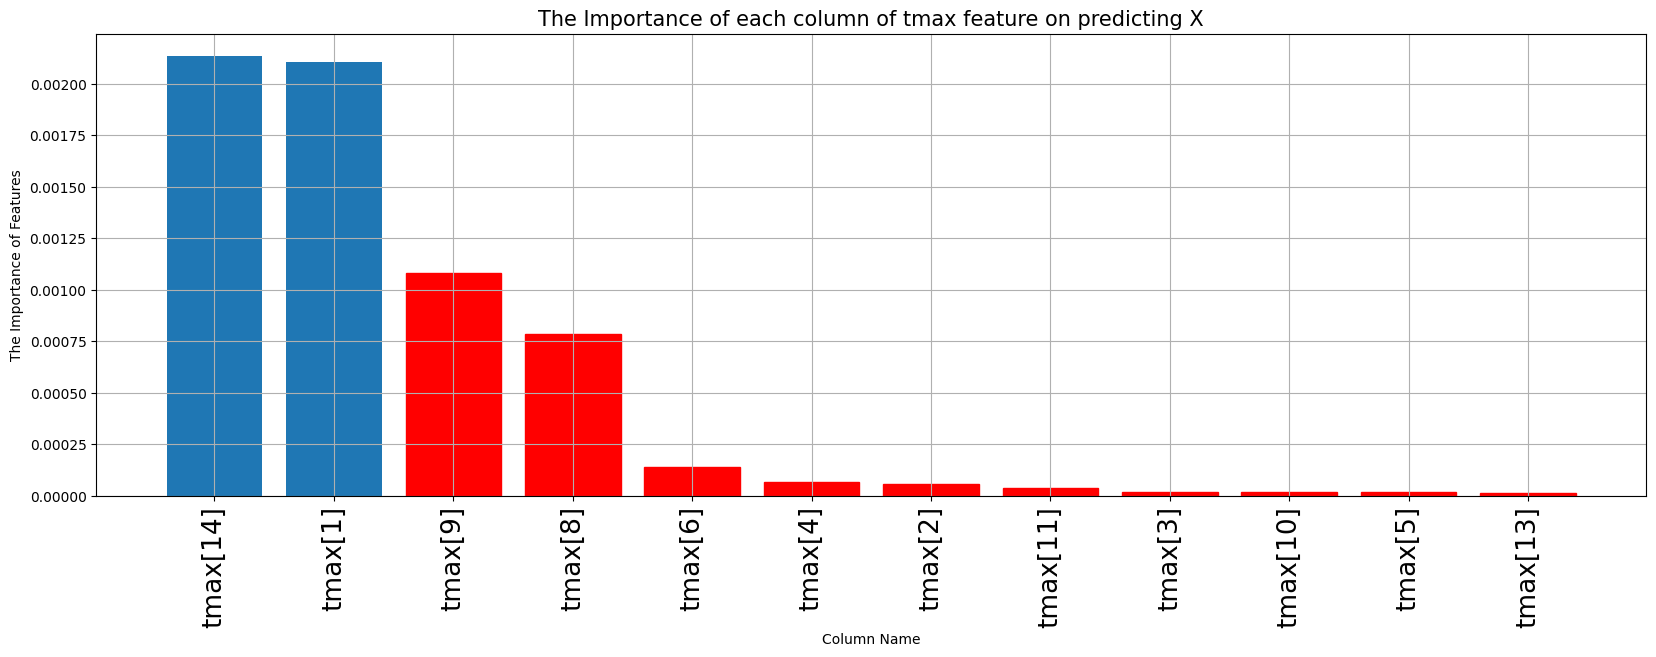

In [36]:
#sort the values of importance for predicting X of tmax columns

df_areas_sorted = filtered_rows.sort_values(by='feature_importance_x', ascending=False)
plt.figure(figsize=(20, 6))
bars = plt.bar(df_areas_sorted.index, df_areas_sorted['feature_importance_x'])
for bar in bars:
    #add the threshold for filtering the columns with low importance
    if bar.get_height() < 0.0015:
        bar.set_color('red')
plt.xlabel('Column Name')
plt.ylabel('The Importance of Features')
plt.title('The Importance of each column of tmax feature on predicting X',fontsize=15)
plt.xticks(rotation=90,fontsize=19)
plt.grid(True)
plt.show()

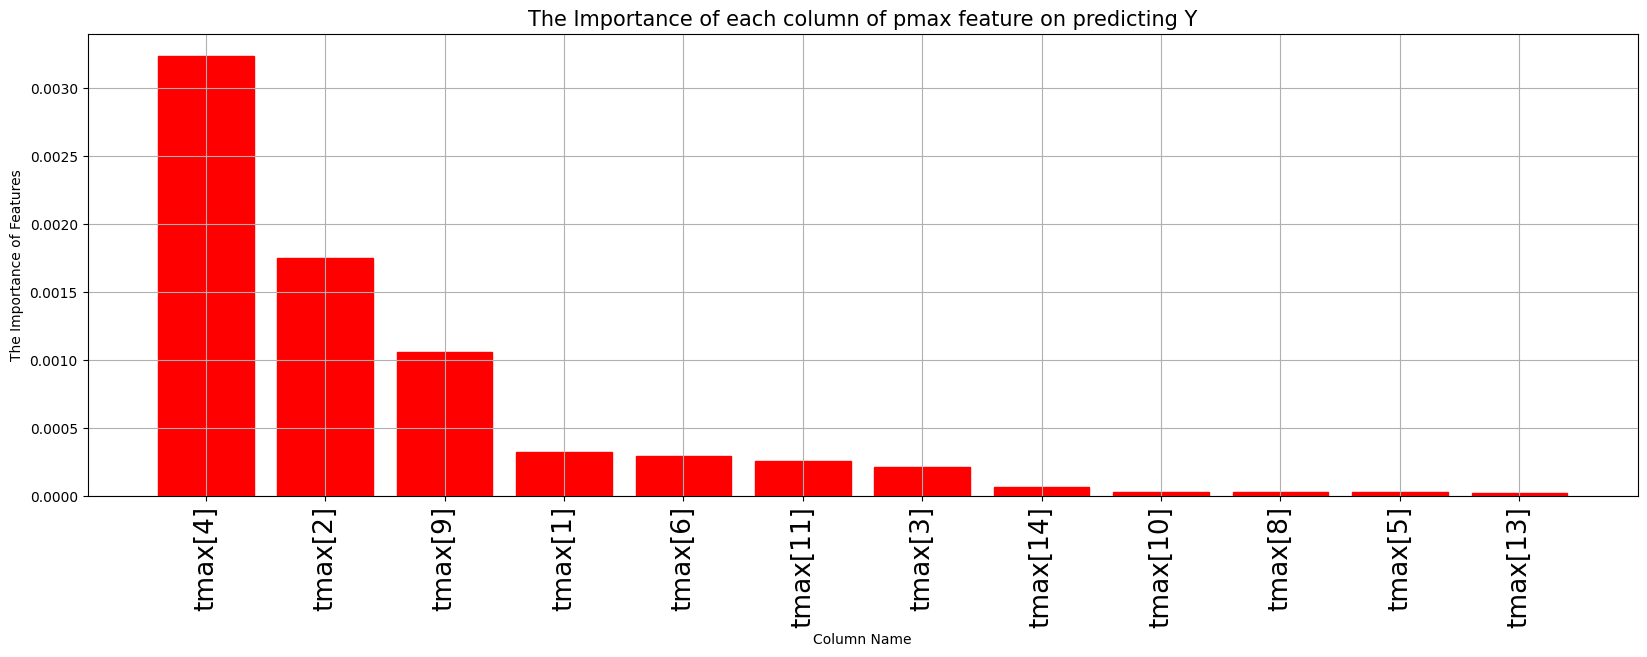

In [43]:
#sort the values of importance for predicting y of tmax columns

df_areas_sorted = filtered_rows.sort_values(by='feature_importance_y', ascending=False)
plt.figure(figsize=(20, 6))
bars = plt.bar(df_areas_sorted.index, df_areas_sorted['feature_importance_y'])
for bar in bars:
    #add the threshold for filtering the columns with low importance
    if bar.get_height() < 0.0036:
        bar.set_color('red')
plt.xlabel('Column Name')
plt.ylabel('The Importance of Features')
plt.title('The Importance of each column of pmax feature on predicting Y',fontsize=15)
plt.xticks(rotation=90,fontsize=19)
plt.grid(True)
plt.show()

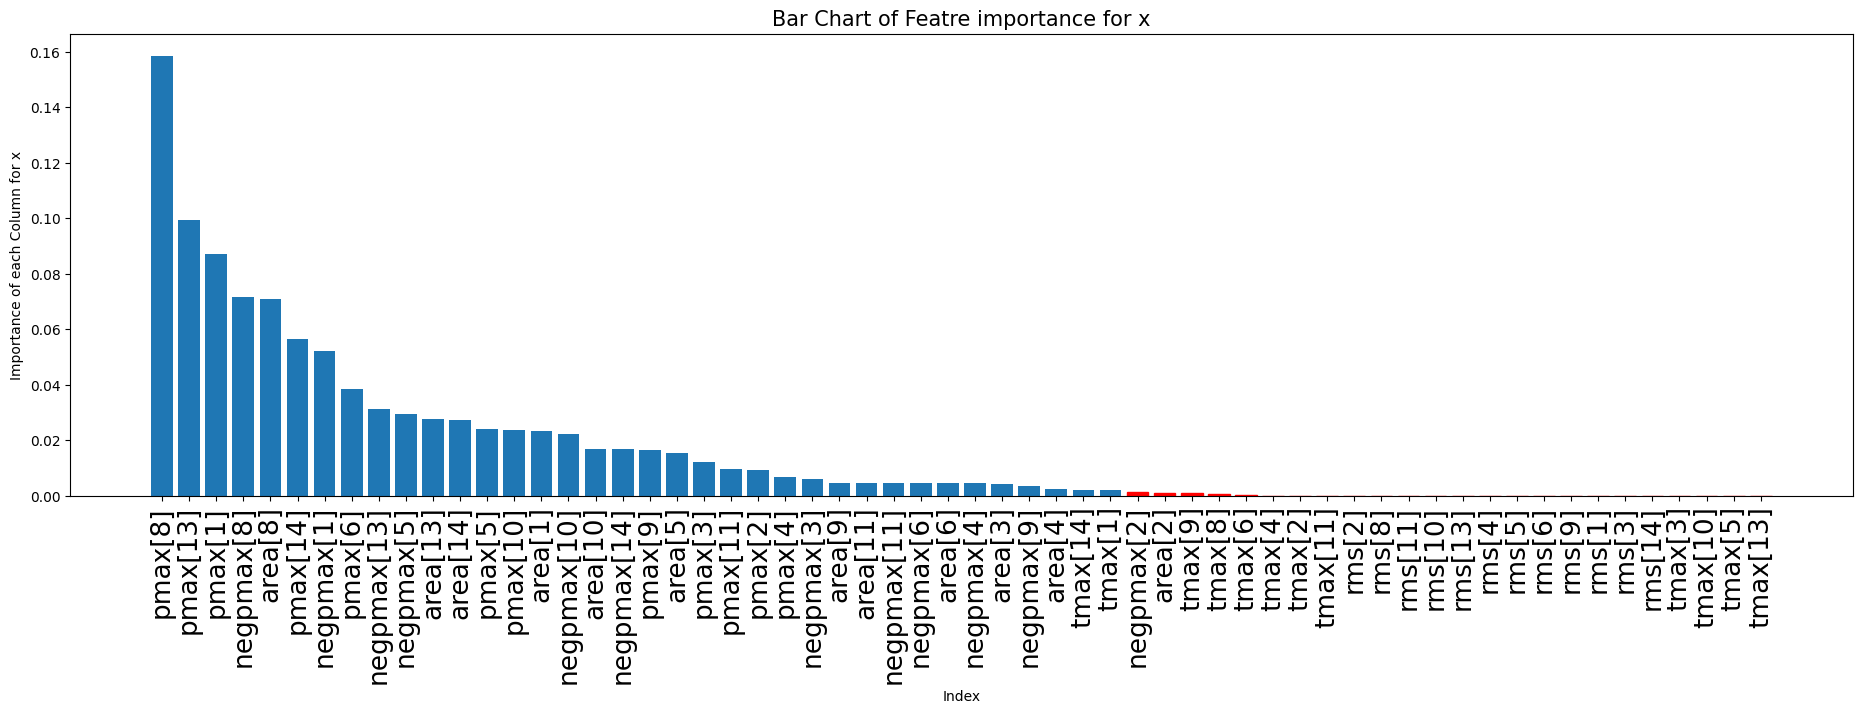

In [37]:
#plot importance of all features for predicting X
df_sorted = feature_importance_df.sort_values(by='feature_importance_x', ascending=False)
plt.figure(figsize=(23, 6))
bars=plt.bar(df_sorted.index, df_sorted['feature_importance_x'])
for bar in bars:
    #add the threshold for filtering the columns with low importance
    if bar.get_height() < 0.0015:
        bar.set_color('red')
plt.xlabel('Index')
plt.ylabel('Importance of each Column for x')
plt.title('Bar Chart of Featre importance for x',fontsize=15)
plt.xticks(rotation=90,fontsize=19)
plt.show()

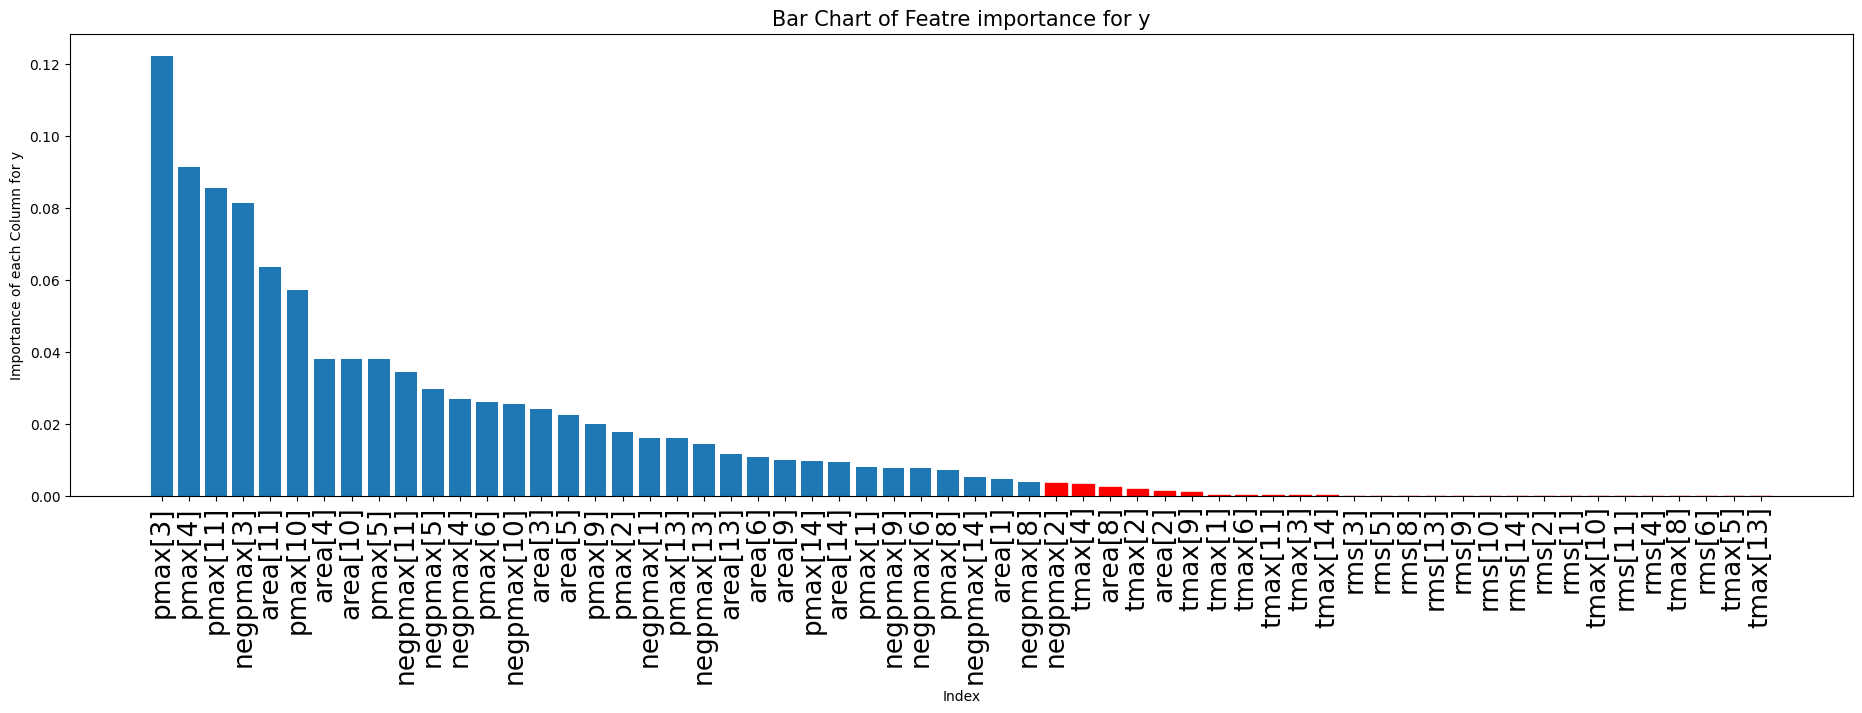

In [40]:
#plot the importance of all features for predciting Y
df_sorted = feature_importance_df.sort_values(by='feature_importance_y', ascending=False)
plt.figure(figsize=(23, 6))
bars=plt.bar(df_sorted.index, df_sorted['feature_importance_y'])
for bar in bars:
    #add the threshold for filtering the columns with low importance
    if bar.get_height() < 0.0036:
        bar.set_color('red')
plt.xlabel('Index')
plt.ylabel('Importance of each Column for y')
plt.title('Bar Chart of Featre importance for y',fontsize=15)
plt.xticks(rotation=90,fontsize=19)
plt.show()

features that have lowest importance for predicting both x and y

['tmax[5]', 'tmax[10]', 'tmax[13]', 'rms[8]', 'rms[5]', 'rms[3]',
       'rms[13]', 'rms[4]', 'rms[1]', 'rms[14]', 'rms[6]', 'rms[11]', 'rms[2]',
       'rms[9]', 'rms[10]', 'tmax[11]', 'tmax[3]', 'tmax[14]', 'tmax[9]',
       'tmax[2]', 'tmax[6]', 'negpmax[2]', 'tmax[8]', 'area[2]']

In [ ]:
features_to_be_removed_in_both = [23,43,53,34,24,14,54,19,4,59,29,49,9,39,44,48,13,58,38,8,28,6,33,7]

In [ ]:
#delete low-importance-features from development set(training data)
X.drop(X.iloc[:,features_to_be_removed_in_both].columns,axis=1,inplace=True)

In [ ]:
#delete low-importance-features from evaluation set (test data)
eval.drop(eval.iloc[:,features_to_be_removed_in_both].columns,axis=1,inplace=True)

In [ ]:
#biuld kneighboreregressor instance (parameters explained in report)
knn_model = KNeighborsRegressor(n_neighbors=100,weights='distance',algorithm='brute',p=2,n_jobs=-1)

In [ ]:
#biuld randomforestregressor instance (parameters explained in report)
rf_model = RandomForestRegressor(n_estimators=100,max_features='sqrt',max_depth=40,min_samples_split=10,min_samples_leaf=5)

In [ ]:
#biuld MLPregressor instance (parameters explained in report)
mlp_reg = MLPRegressor(hidden_layer_sizes=(128,64),activation='tanh',learning_rate='adaptive',solver='adam',max_iter=200,verbose=True)

In [ ]:
#define a function for save the output prediction file
def csv_creator(df,name_of_file):
  submit = pd.DataFrame({'Id': ids, 'Predictedx': df.loc[:,0], 'Predictedy': df.iloc[:,1]})
  submit['Predicted'] = submit['Predictedx'].map(str) + ' | ' + submit['Predictedy'].map(str)
  submit = submit.drop(['Predictedx' , 'Predictedy'], axis = 1)
  submit.to_csv(f'{name_of_file}.csv', index = False)

In [ ]:
#define a pipeline that contains StandardScaler for standardize data and MutlioutputRegreesor that contains knn_model which defined previously for handeling model through predicting both features
pipeline_knn = Pipeline([
    ('scaler',StandardScaler()),
    ('knn',MultiOutputRegressor(knn_model))
])

In [ ]:
#define a pipeline that contains StandardScaler for standardize data and MutlioutputRegreesor that contains rf_model which defined previously for handeling model through predicting both features
pipeline_rf = Pipeline([
    ('scaler',StandardScaler()),
    ('rfr',MultiOutputRegressor(rf_model))
])

In [ ]:
#define a pipeline that contains StandardScaler for standardize data and MutlioutputRegreesor that contains mlp_reg which defined previously for handeling model through predicting both features
pipeline_mlp = Pipeline([
    ('scaler',StandardScaler()),
    ('mlp_reg',MultiOutputRegressor(mlp_reg))
])

In [ ]:
#training knn model with developemnt data
pipeline_knn.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 MultiOutputRegressor(estimator=KNeighborsRegressor(algorithm='brute',
                                                                    n_jobs=-1,
                                                                    n_neighbors=200,
                                                                    weights='distance')))])

In [ ]:
#testing knn model with evaluation data and store result as a csv file
res_knn = pd.DataFrame(pipeline_knn.predict(eval))
csv_creator(res_knn,'KNNRegressor Result')

In [ ]:
#training randomforesrt regressor model with development data
pipeline_rf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfr',
                 MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=40,
                                                                      max_features='sqrt',
                                                                      min_samples_leaf=5,
                                                                      min_samples_split=10)))])

In [ ]:
#testing randomforestregressor model with evaluation data and store result as a csv file
res_rf = pd.DataFrame(pipeline_rf.predict(eval))
csv_creator(res_rf,'RandomForestRegressorResult')

In [ ]:
#training mlpregressor model with development data
pipeline_mlp.fit(X,y)

Iteration 1, loss = 60149.15915894
Iteration 2, loss = 30431.74165949
Iteration 3, loss = 14220.86128396
Iteration 4, loss = 5743.70561402
Iteration 5, loss = 1963.32900379
Iteration 6, loss = 497.92512693
Iteration 7, loss = 83.90757053
Iteration 8, loss = 17.59109163
Iteration 9, loss = 9.65445776
Iteration 10, loss = 8.69621474
Iteration 11, loss = 7.96621692
Iteration 12, loss = 8.01409544
Iteration 13, loss = 7.31390931
Iteration 14, loss = 7.60470586
Iteration 15, loss = 7.29941407
Iteration 16, loss = 7.20886912
Iteration 17, loss = 7.13158390
Iteration 18, loss = 6.75231677
Iteration 19, loss = 6.93636391
Iteration 20, loss = 6.86964901
Iteration 21, loss = 6.29286223
Iteration 22, loss = 6.56467453
Iteration 23, loss = 6.34245549
Iteration 24, loss = 6.62175056
Iteration 25, loss = 6.50021687
Iteration 26, loss = 6.44120287
Iteration 27, loss = 6.48356050
Iteration 28, loss = 6.74224777
Iteration 29, loss = 6.19393226
Iteration 30, loss = 6.30719780
Iteration 31, loss = 6.3711

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 61695.76045754
Iteration 2, loss = 31118.33443428
Iteration 3, loss = 14279.15917820
Iteration 4, loss = 5664.45642607
Iteration 5, loss = 1836.22009544
Iteration 6, loss = 459.99106059
Iteration 7, loss = 94.73024406
Iteration 8, loss = 22.49861310
Iteration 9, loss = 12.47286884
Iteration 10, loss = 11.06331766
Iteration 11, loss = 10.50477719
Iteration 12, loss = 10.26779964
Iteration 13, loss = 10.04621452
Iteration 14, loss = 9.83242426
Iteration 15, loss = 9.66167894
Iteration 16, loss = 9.46805317
Iteration 17, loss = 9.33193950
Iteration 18, loss = 9.23521133
Iteration 19, loss = 9.17575536
Iteration 20, loss = 8.98112718
Iteration 21, loss = 9.04397608
Iteration 22, loss = 8.83889358
Iteration 23, loss = 8.84655914
Iteration 24, loss = 8.79369372
Iteration 25, loss = 8.84868494
Iteration 26, loss = 8.70729320
Iteration 27, loss = 8.62576781
Iteration 28, loss = 8.67552525
Iteration 29, loss = 8.46606105
Iteration 30, loss = 8.62802244
Iteration 31, loss = 8

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp_reg',
                 MultiOutputRegressor(estimator=MLPRegressor(activation='tanh',
                                                             hidden_layer_sizes=(128,
                                                                                 64),
                                                             learning_rate='adaptive',
                                                             verbose=True)))])

In [ ]:
#testing mlpregressor model with evaluation data and store result as a csv file
res_mlp = pd.DataFrame(pipeline_mlp.predic(eval))
csv_creator(res_mlp,'MLPRegressor Result')